In [1]:
!pip install --upgrade xee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.4/476.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: earthengine-api
    Found existing installation: earthengine-api 1.5.24
    Uninstalling earthengine-api-1.5.24:
      Successfully uninstalled earthengine-api-1.5.24


In [2]:
!pip install -U geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: geemap
    Found existing installation: geemap 0.35.3
    Uninstalling geemap-0.35.3:
      Successfully uninstalled geemap-0.35.3


In [3]:
import ee

In [4]:
ee.Authenticate()
ee.Initialize(project = "ee-grmntfrancis0",
              opt_url='https://earthengine-highvolume.googleapis.com')

In [5]:
import geemap

In [98]:
map = geemap.Map()
map.add("basemap_selector")
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [99]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          33.593764,
                          4.336823
                        ],
                        [
                          33.593764,
                          4.517557
                        ],
                        [
                          33.827526,
                          4.517557
                        ],
                        [
                          33.827526,
                          4.336823
                        ],
                        [
                          33.593764,
                          4.336823
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [100]:
roi = ee.Geometry.Polygon([[33.41889, 4.175215], [33.41889, 4.539454], [33.921426, 4.539454], [33.921426, 4.175215], [33.41889, 4.175215]])
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              33.41889,
              4.175215
            ],
            [
              33.41889,
              4.539454
            ],
            [
              33.921426,
              4.539454
            ],
            [
              33.921426,
              4.175215
            ],
            [
              33.41889,
              4.175215
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [101]:
pop = ee.ImageCollection("JRC/GHSL/P2023A/GHS_POP")
pop

In [102]:
pop_stack = pop.toBands().clip(roi)
pop_stack

In [103]:
import geemap

In [104]:
map = geemap.Map()
map.add("basemap_selector")

map.addLayer(pop_stack,{},'pop_stack')

In [105]:
def pop_count(img):
  pop_sum = img.reduceRegion(reducer = ee.Reducer.sum(), geometry = roi, scale = 100).values().get(0)
  date = img.date().format('YYYY-MM-dd')
  return ee.Feature(None, {'date': date, 'pop': pop_sum})

In [106]:
pop_val = pop.map(pop_count)
pop_val

In [107]:
feature_list = pop_val.toList(pop_val.size()).getInfo()
feature_list

[{'type': 'Feature',
  'geometry': None,
  'id': '1975',
  'properties': {'date': '1975-01-01', 'pop': 425.84310736678736}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1980',
  'properties': {'date': '1980-01-01', 'pop': 911.8140055804585}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1985',
  'properties': {'date': '1985-01-01', 'pop': 1997.5836810709654}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1990',
  'properties': {'date': '1990-01-01', 'pop': 3929.876037129051}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1995',
  'properties': {'date': '1995-01-01', 'pop': 8484.498417973375}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2000',
  'properties': {'date': '2000-01-01', 'pop': 18726.35918430648}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2005',
  'properties': {'date': '2005-01-01', 'pop': 42814.62248097927}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2010',
  'properties': {'date': '2010-01-01', 'pop': 94651.43454988532}},
 {'typ

In [108]:
date = [items['properties']['date'] for items in feature_list]
date

['1975-01-01',
 '1980-01-01',
 '1985-01-01',
 '1990-01-01',
 '1995-01-01',
 '2000-01-01',
 '2005-01-01',
 '2010-01-01',
 '2015-01-01',
 '2020-01-01',
 '2025-01-01',
 '2030-01-01']

In [109]:
pop_sum = [items['properties']['pop'] for items in feature_list]
pop_sum

[425.84310736678736,
 911.8140055804585,
 1997.5836810709654,
 3929.876037129051,
 8484.498417973375,
 18726.35918430648,
 42814.62248097927,
 94651.43454988532,
 174209.0178668379,
 242343.5223797591,
 350004.0369239886,
 494722.6290634828]

In [110]:
import numpy as np

In [111]:
import pandas as pd

In [112]:
df = pd.DataFrame({'date': date, 'pop': pop_sum})
df['date'] = pd.to_datetime(df['date'])
df_index = df.set_index('date').round(0)
df_index

,pop
date,
1975-01-01,426.0
1980-01-01,912.0
1985-01-01,1998.0
1990-01-01,3930.0
1995-01-01,8484.0
2000-01-01,18726.0
2005-01-01,42815.0
2010-01-01,94651.0
2015-01-01,174209.0


In [113]:
df_index.to_csv('tehran_pop.csv')

In [114]:
"""pop_growth_rate = log(current/previous)/interval

pop_change_rate = ((current - previous) / previous ) * 100
"""

'pop_growth_rate = log(current/previous)/interval\n\npop_change_rate = ((current - previous) / previous ) * 100\n'

In [115]:
current = df_index.copy()
previous = df_index.shift(1)
previous

,pop
date,
1975-01-01,NaN
1980-01-01,426.0
1985-01-01,912.0
1990-01-01,1998.0
1995-01-01,3930.0
2000-01-01,8484.0
2005-01-01,18726.0
2010-01-01,42815.0
2015-01-01,94651.0


In [116]:
df_index['change'] = ((current - previous) / previous) * 100.0
df_index

,pop,change
date,,
1975-01-01,426.0,NaN
1980-01-01,912.0,114.084507
1985-01-01,1998.0,119.078947
1990-01-01,3930.0,96.696697
1995-01-01,8484.0,115.877863
2000-01-01,18726.0,120.721358
2005-01-01,42815.0,128.639325
2010-01-01,94651.0,121.069719
2015-01-01,174209.0,84.054051


In [130]:
df_index['growth_rate'] = np.log(current / previous)
df_index

,pop,change,growth_rate
date,,,
1975-01-01,426.0,NaN,NaN
1980-01-01,912.0,114.084507,0.761201
1985-01-01,1998.0,119.078947,0.784262
1990-01-01,3930.0,96.696697,0.676493
1995-01-01,8484.0,115.877863,0.769543
2000-01-01,18726.0,120.721358,0.791731
2005-01-01,42815.0,128.639325,0.826976
2010-01-01,94651.0,121.069719,0.793308
2015-01-01,174209.0,84.054051,0.610059


In [132]:
df_index['growth_rate'] = np.log(current / previous) / 5.0
df_index

,pop,change,growth_rate
date,,,
1975-01-01,426.0,NaN,NaN
1980-01-01,912.0,114.084507,0.152240
1985-01-01,1998.0,119.078947,0.156852
1990-01-01,3930.0,96.696697,0.135299
1995-01-01,8484.0,115.877863,0.153909
2000-01-01,18726.0,120.721358,0.158346
2005-01-01,42815.0,128.639325,0.165395
2010-01-01,94651.0,121.069719,0.158662
2015-01-01,174209.0,84.054051,0.122012


<Axes: xlabel='date'>

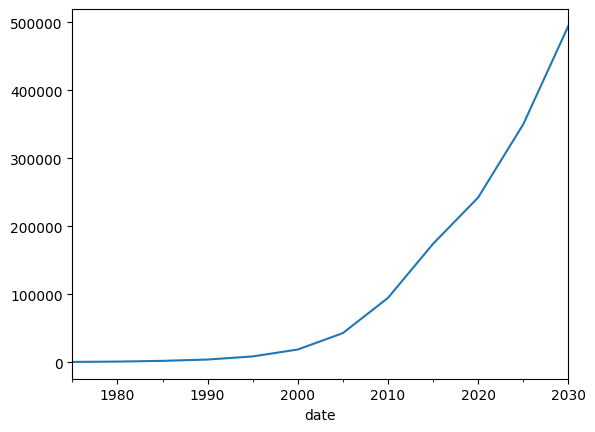

In [133]:
df_index['pop'].plot()

<Axes: xlabel='date'>

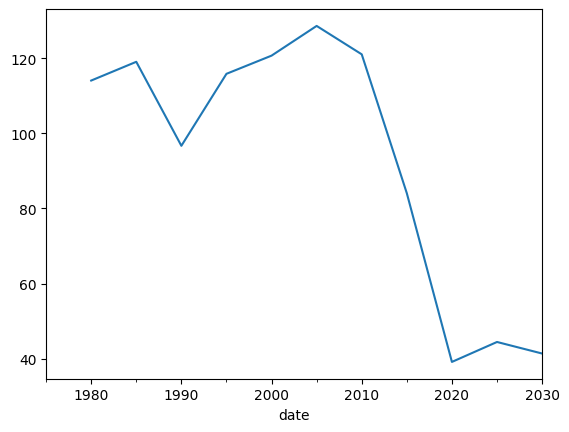

In [134]:
df_index['change'].plot()

<Axes: xlabel='date'>

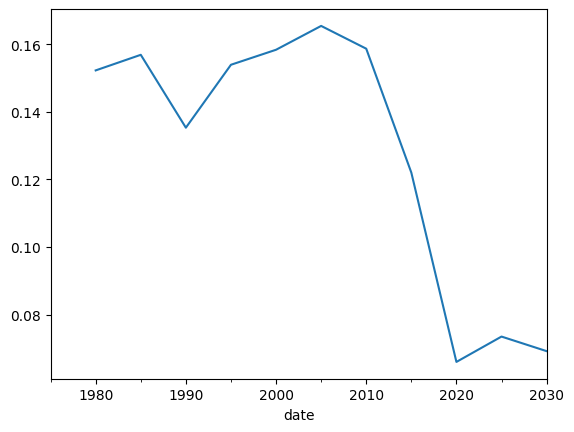

In [135]:
df_index['growth_rate'].plot()

In [136]:
import matplotlib.pyplot as plt

In [137]:
pop_annual_smoothed = df_index['pop'].rolling(window=5, center=True).mean().fillna(df_index['pop'])
pop_annual_smoothed

,pop
date,
1975-01-01,426.0
1980-01-01,912.0
1985-01-01,3150.0
1990-01-01,6810.0
1995-01-01,15190.6
2000-01-01,33721.2
2005-01-01,67777.0
2010-01-01,114549.0
2015-01-01,180804.6


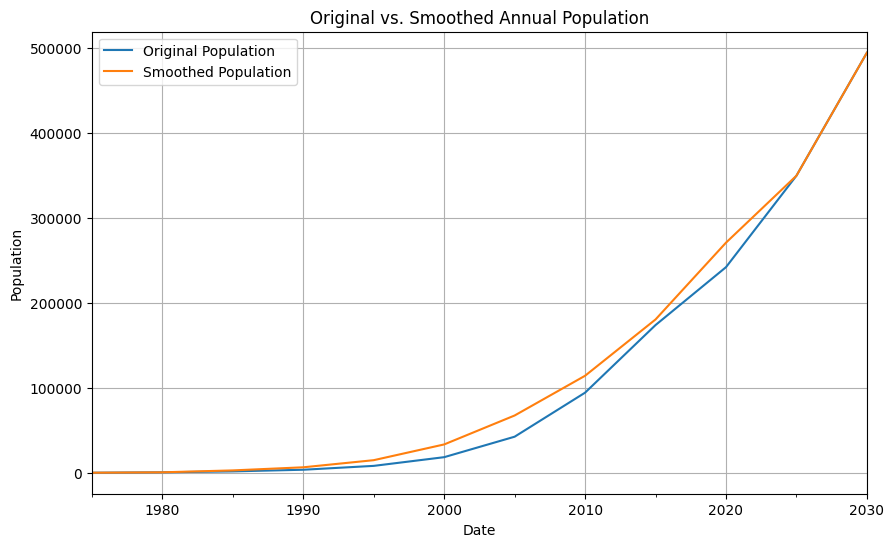

In [138]:
change_smoothed = df_index['change'].rolling(window=5, center=True).mean().fillna(df_index['change'])
growth_rate_smoothed = df_index['growth_rate'].rolling(window=5, center=True).mean().fillna(df_index['growth_rate'])

# Plotting Population (Original vs. Smoothed)
plt.figure(figsize=(10, 6))
df_index['pop'].plot(label='Original Population', legend=True)
pop_annual_smoothed.plot(label='Smoothed Population', legend=True)
plt.title('Original vs. Smoothed Annual Population')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.show()

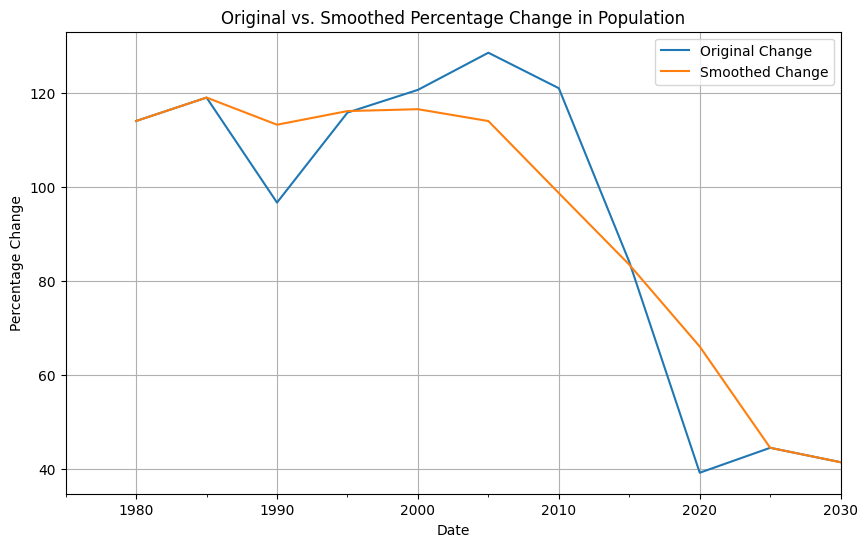

In [139]:
# Plotting Change (Original vs. Smoothed)
plt.figure(figsize=(10, 6))
df_index['change'].plot(label='Original Change', legend=True)
change_smoothed.plot(label='Smoothed Change', legend=True)
plt.title('Original vs. Smoothed Percentage Change in Population')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

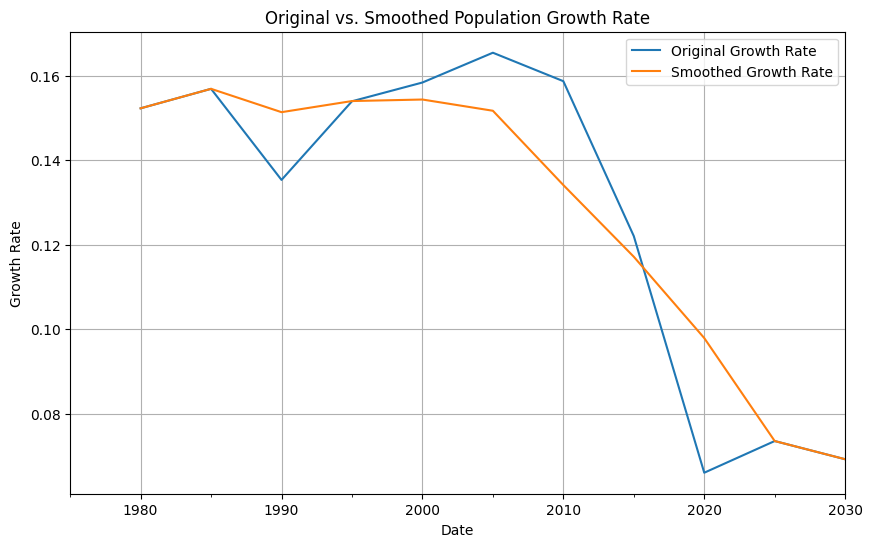

In [140]:
# Plotting Growth Rate (Original vs. Smoothed)
plt.figure(figsize=(10, 6))
df_index['growth_rate'].plot(label='Original Growth Rate', legend=True)
growth_rate_smoothed.plot(label='Smoothed Growth Rate', legend=True)
plt.title('Original vs. Smoothed Population Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Annual Population with Smoothing'}, xlabel='date'>

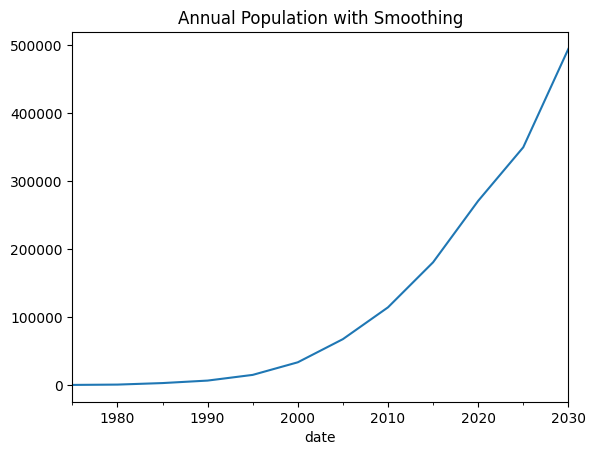

In [141]:
pop_annual_smoothed.plot(title='Annual Population with Smoothing')

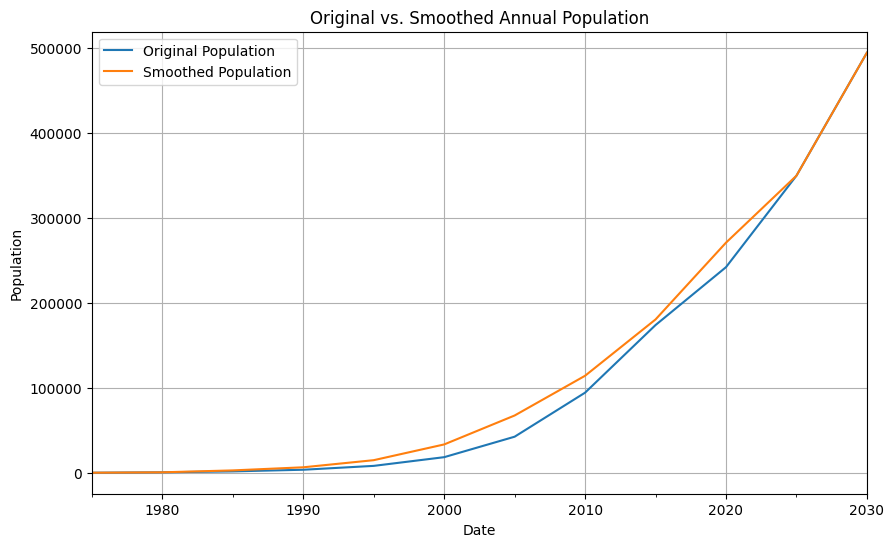

In [142]:
# To display both the original and smoothed data on the same chart for comparison:
plt.figure(figsize=(10, 6))
df_index['pop'].plot(label='Original Population', legend=True)
pop_annual_smoothed.plot(label='Smoothed Population', legend=True)
plt.title('Original vs. Smoothed Annual Population')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.show()